In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
 df= pd.read_csv('Diwali Sales Data.csv', header = 0, 
               encoding = 'unicode_escape')

##### <i> encoding = 'unicode_escape' has been used because there was an eoorr loading the file

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [17]:
df.shape

(11251, 15)

### Data Pre-processing : 


#### Treating Null Values

In [18]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11247,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11248,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [19]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
df.isnull().sum().sum()

22514

##### Amount has 12 Null values and status and unnamed1 have all the null values and total we have 22514 nulls


In [23]:
df = df.dropna(how= 'all')

In [27]:
df = df.drop(columns=['Status'])
df = df.drop(columns=['unnamed1'])


In [28]:
df.isnull().sum().sum()

12

In [35]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

##### time to treat nulls of Amount

df.head()

since the null values in amount column are very less so they can be substituted by the mean of all values

In [30]:
df=df.fillna(value = df['Amount'].mean())

In [32]:
df.isnull().sum().sum()

0

Hence we have successfully treated our null values 

In [36]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [37]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5219.569870
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


### Exploratory Data Analysis (EDA)

In [44]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

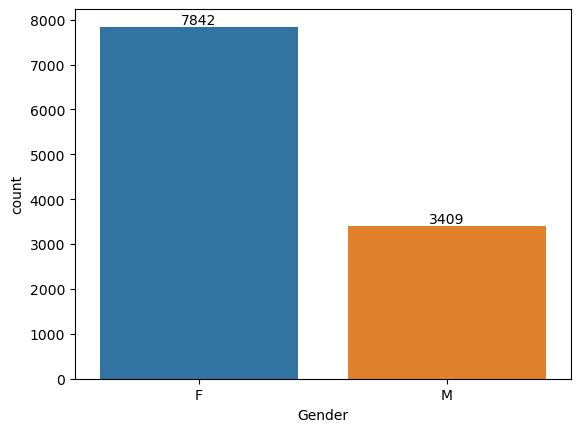

In [46]:
gd= sns.countplot(x='Gender', data=df)
for bars in gd.containers:
    gd.bar_label(bars)

##### We have 7842 Females compared to only 3409 Males 

<Axes: xlabel='Gender', ylabel='Amount'>

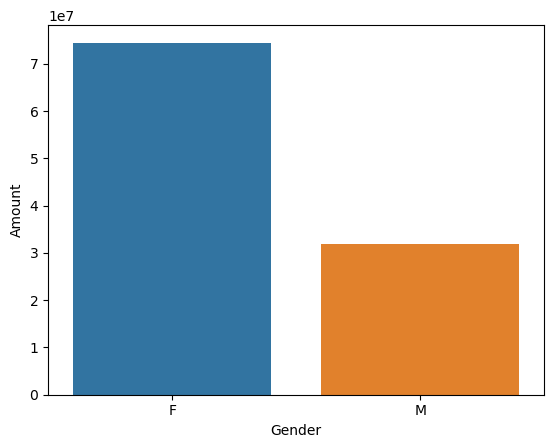

In [53]:
sales_gen = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Gender', y='Amount', data = sales_gen)


#### from above graphs we can conclude that more women purchase than men and also the purchasing power of women is more than that of men

#### Age

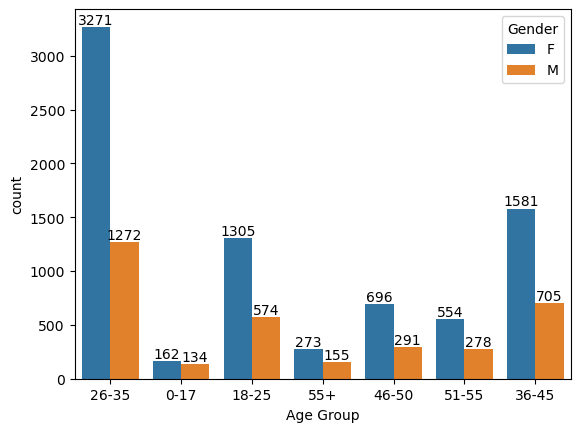

In [56]:
ax= sns.countplot(data=df , x='Age Group' , hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
    

Here we can see that maximum number of customers are in the age group 26-35 and there as well Females are more 

<Axes: xlabel='Age Group', ylabel='Amount'>

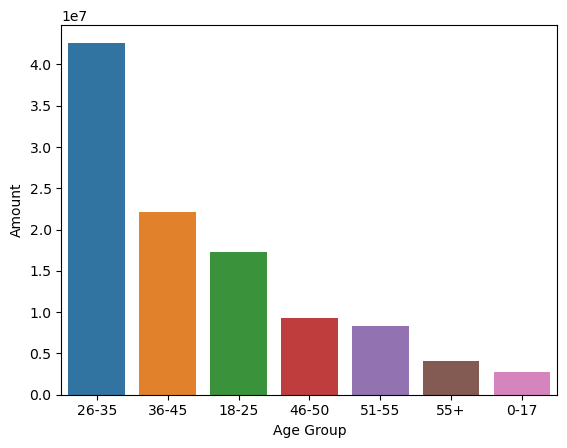

In [60]:
sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Age Group', y='Amount', data = sales_age)


##### Most buyers are in age group 26-35 women

#### States 

<Axes: xlabel='State', ylabel='Orders'>

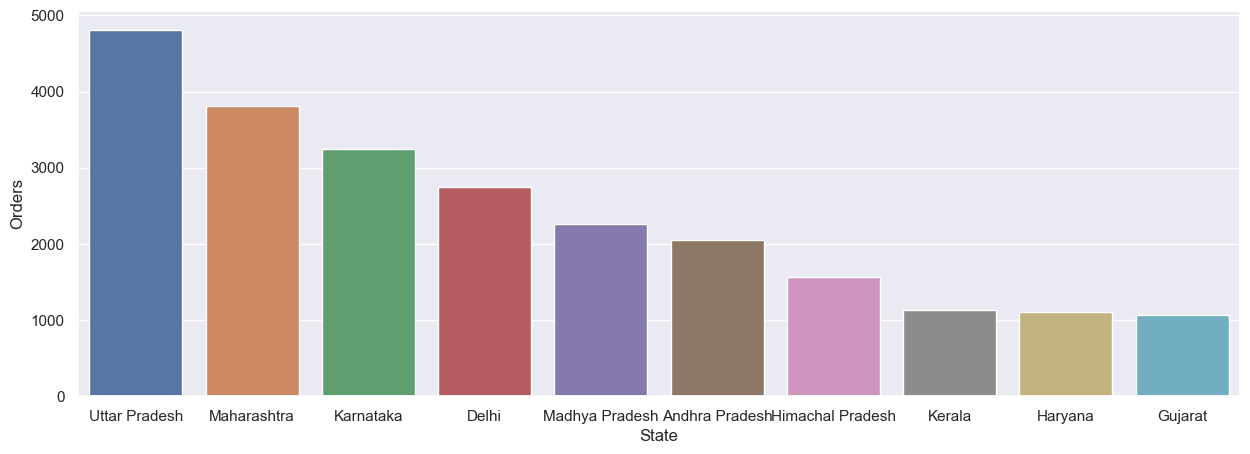

In [72]:
sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Orders', data = sales_state)


Max order states are : UP>Maha>Karnataka>Delhi

<Axes: xlabel='State', ylabel='Amount'>

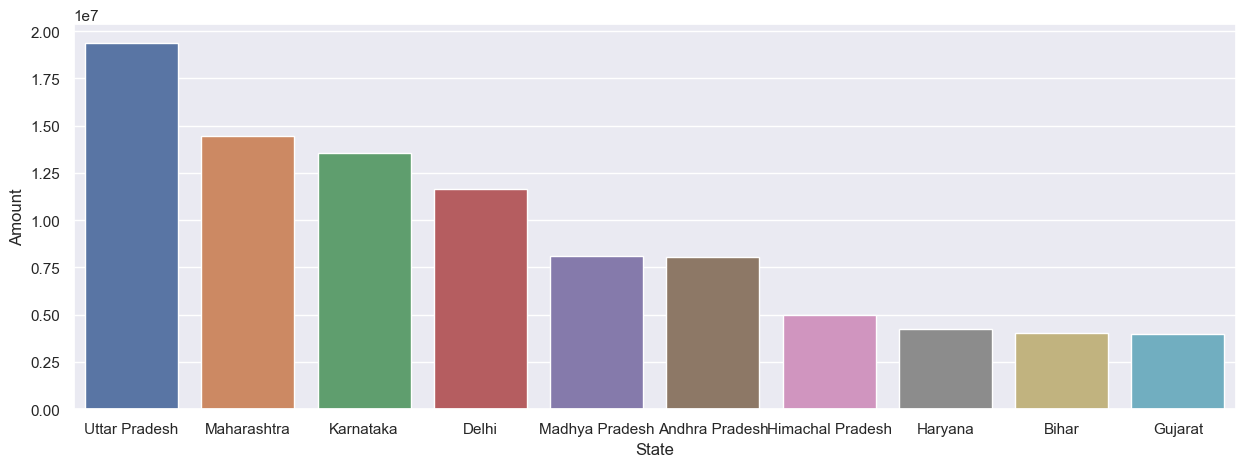

In [75]:
sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Amount', data = sales_state)


We can see that according to purchasing power top states are : UP > Maha > Karnataka > Delhi 

#### Marital Status 

In [76]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='Orders'>

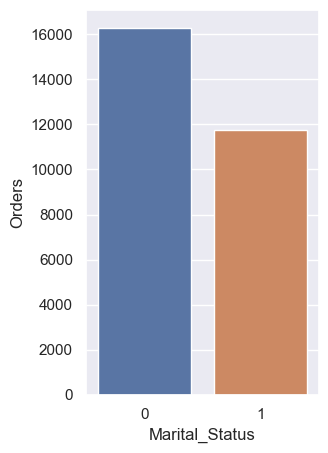

In [86]:
sales_marital = df.groupby(['Marital_Status'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(3,5)})
sns.barplot(x='Marital_Status', y='Orders', data = sales_marital)



In [89]:
sales_marital = df.groupby(['Marital_Status'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(3,5)})
sns.barplot(data = sales_marital, x='Marital_Status', y='Amount', hue ='Gender')



ValueError: Could not interpret input 'Gender'

maximum orders were made my Married Women and they have Maximum Purchasing Power

#### Occupation 

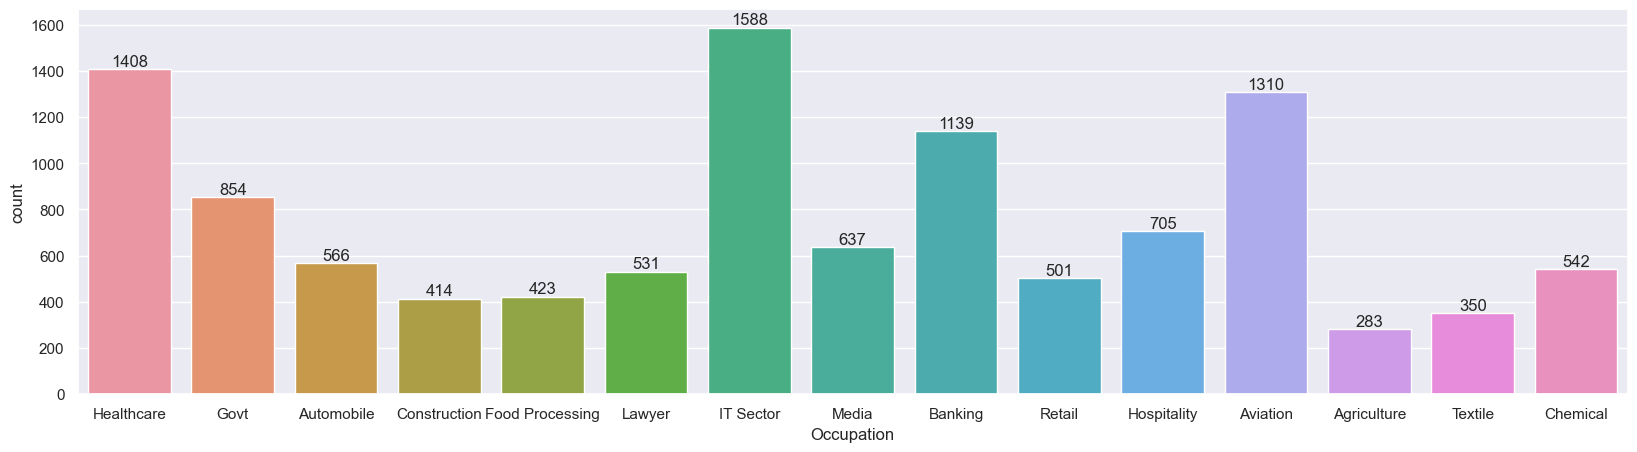

In [92]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data=df , x='Occupation' )
for bars in ax.containers:
    ax.bar_label(bars)
    

Maximum amount of people are in IT 

<Axes: xlabel='Occupation', ylabel='Amount'>

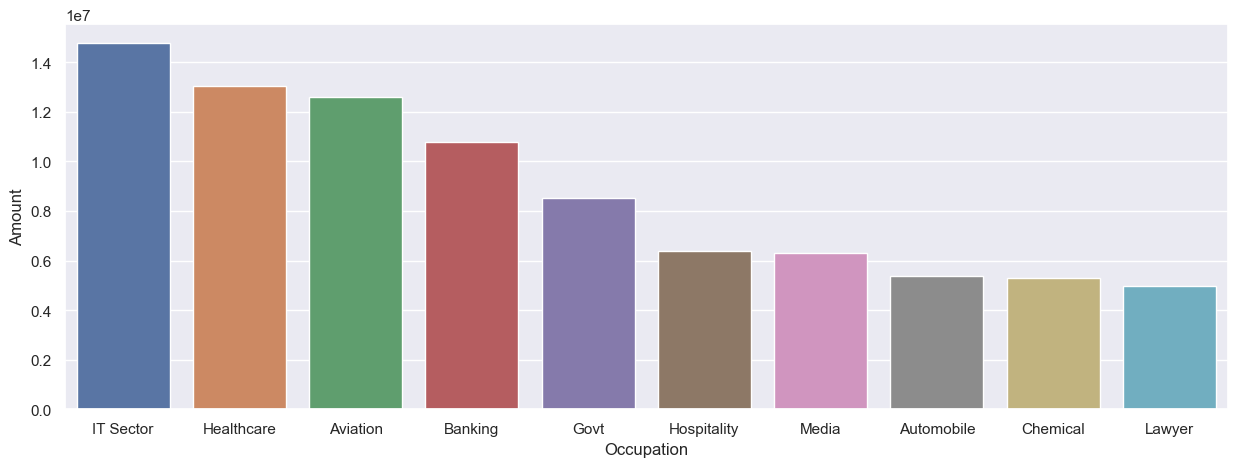

In [95]:
sales_occupation = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_occupation, x='Occupation', y='Amount')



<Axes: xlabel='Occupation', ylabel='Orders'>

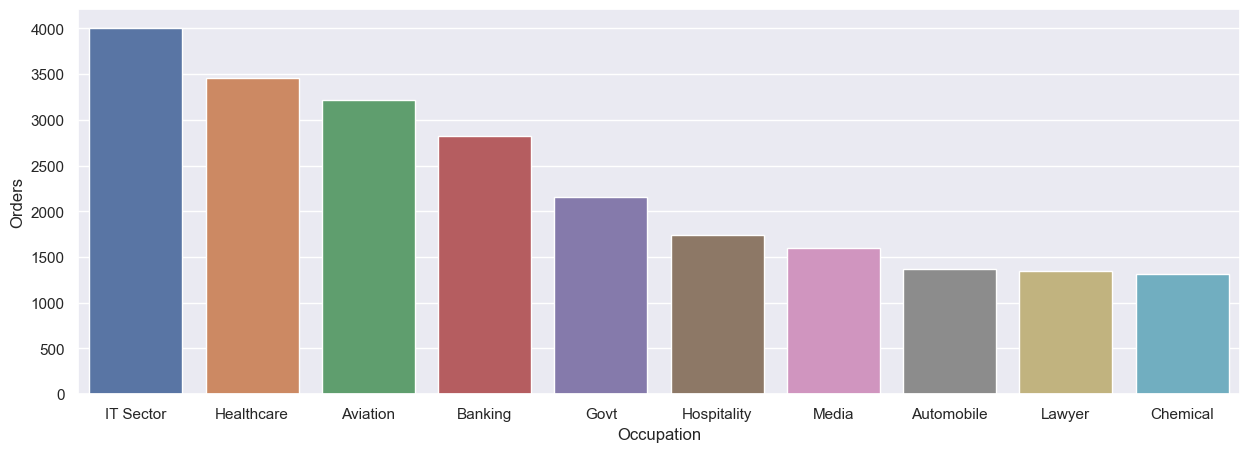

In [96]:
sales_occupation = df.groupby(['Occupation'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_occupation, x='Occupation', y='Orders')



#####  Maximum orders are from IT sector and so it the purchasing power

#### product category

In [97]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

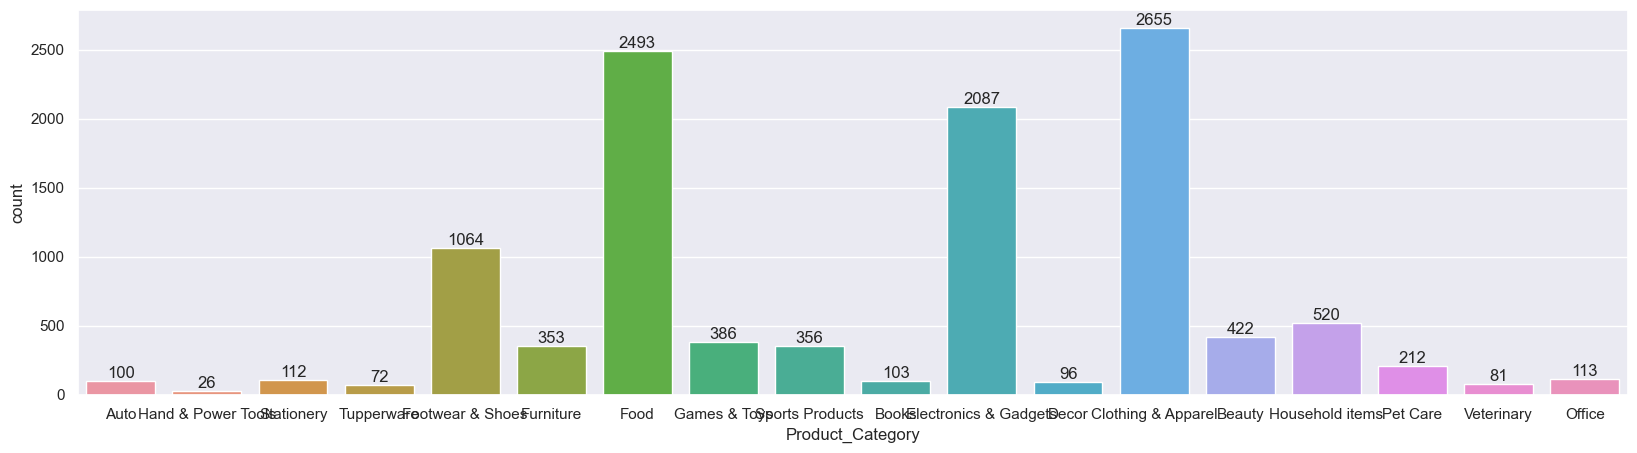

In [98]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data=df , x='Product_Category' )
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Product_Category', ylabel='Amount'>

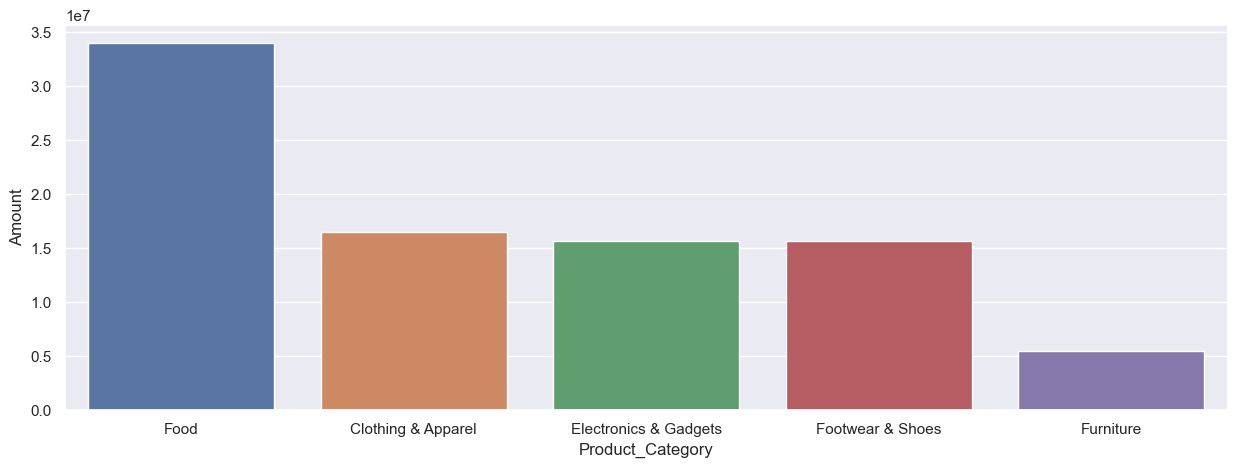

In [100]:
sales_occupation = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_occupation, x='Product_Category', y='Amount')



<Axes: xlabel='Product_Category', ylabel='Orders'>

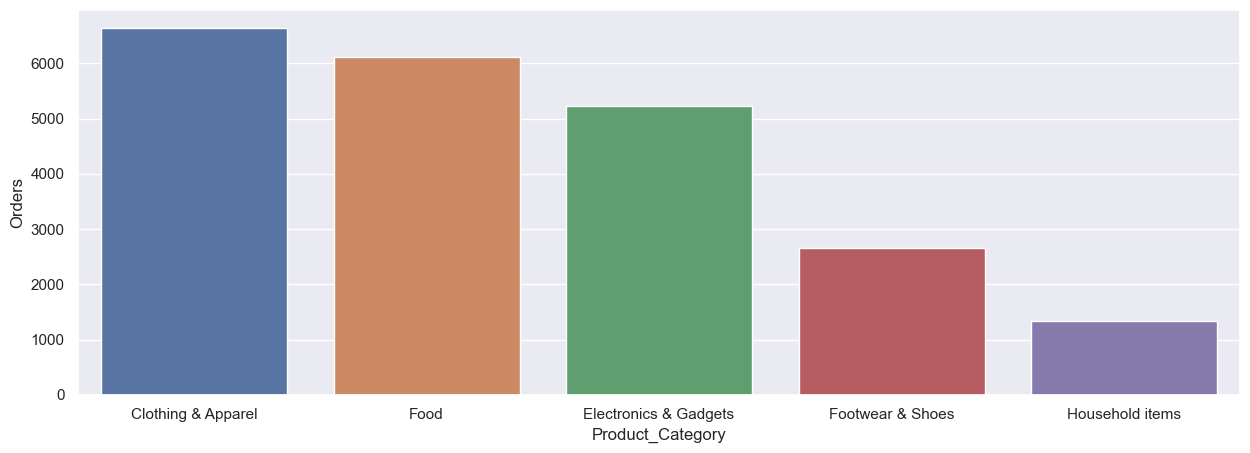

In [101]:
sales_occupation = df.groupby(['Product_Category'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_occupation, x='Product_Category', y='Orders')



##### Maximum orders are coming from Clothing & Apparel and Maximum Amount is being spent on Food 

### Conclusion 

#### <i> Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category